In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Define the file path 
path = r"C:\Users\khush\OneDrive\Documents\Insider-trading\insider-trading-signal\ETL\final_data_2025Q1.parquet"
# Load the data into a pandas DataFrame using the fastparquet engine
df = pd.read_parquet(path, engine="fastparquet")
# Display the first 20 rows to inspect the data structure
df.head(20)

,side,log_dollar_value,role,is_10b5_1,log_size_vs_cap,label_up_market
3,sell,15.441086,OFFICER,0,-9.087956,1
4,sell,14.496378,DIRECTOR,0,-10.032665,1
5,buy,13.401964,OFFICER,0,-9.559271,1
6,sell,14.673079,OFFICER,1,-10.128313,0
7,sell,11.586464,DIRECTOR,1,-13.214937,0
8,sell,15.554449,OFFICER,1,-9.246943,0
9,sell,13.269491,OFFICER,0,-10.009910,0
10,sell,15.226362,OFFICER,0,-8.053038,0
11,sell,13.603320,DIRECTOR,0,-9.676081,0
19,sell,11.336200,OFFICER,0,-11.597717,1


In [3]:
# Convert categorical columns ('side' and 'role') into numeric dummy variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['side', 'role'], drop_first=True)

# Define Features and Target

In [4]:
# Define the target variable
target_col = 'label_up_market'
# Create the Feature Matrix (X) by dropping the target column
X = df_encoded.drop(columns=[target_col])

# Create the Target Vector (y)
y = df_encoded[target_col]

# Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [6]:
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
# Generate predictions on the unseen testing data
y_pred = clf.predict(X_test)

# Evaluation

In [8]:
print("--- Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Model Performance ---
Accuracy: 0.5932

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       708
           1       0.49      0.18      0.27       477

    accuracy                           0.59      1185
   macro avg       0.55      0.53      0.49      1185
weighted avg       0.56      0.59      0.54      1185



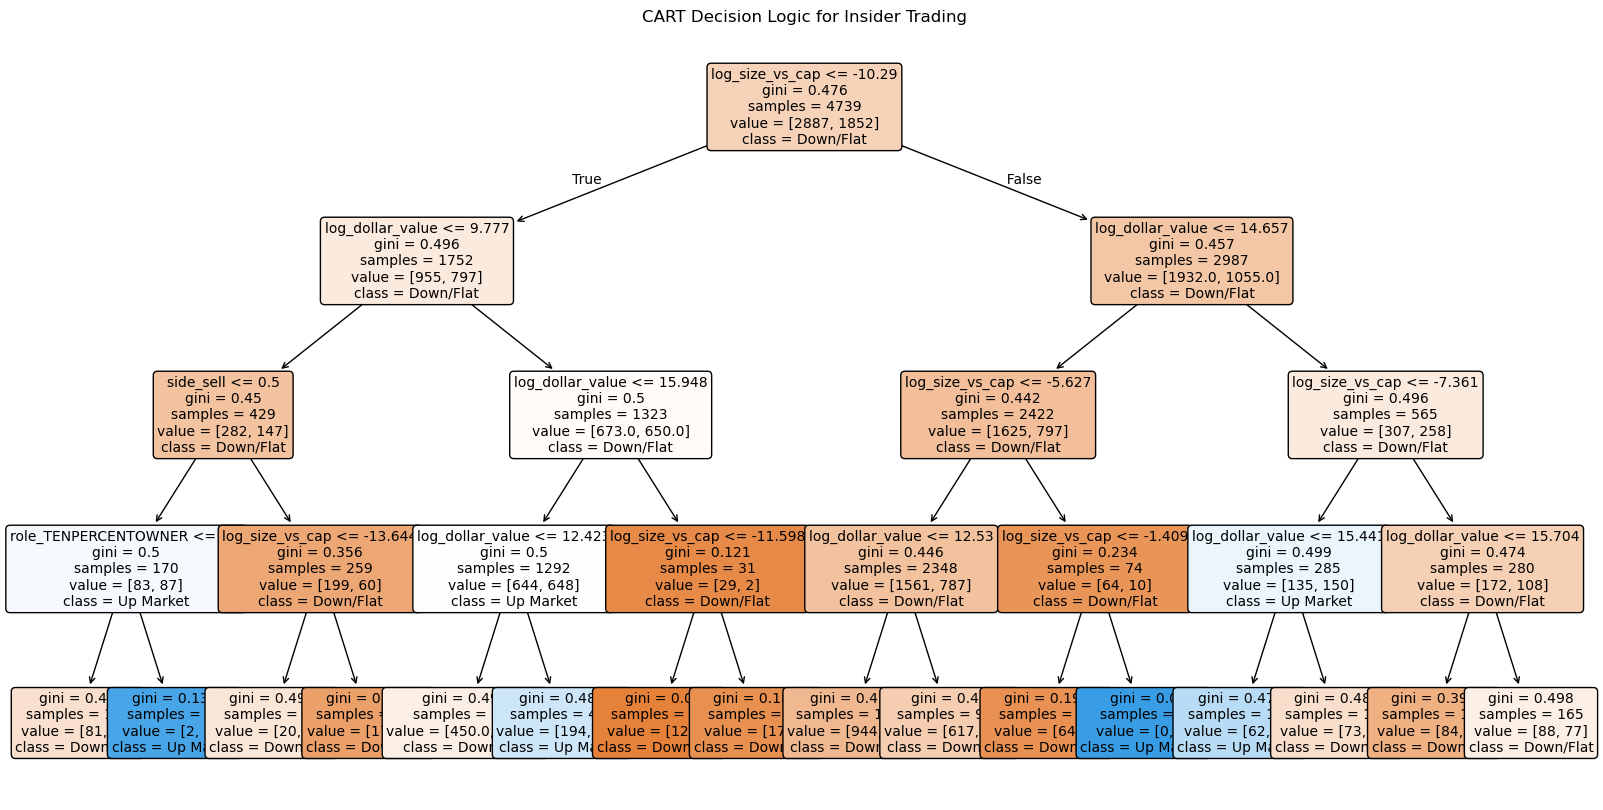

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Down/Flat', 'Up Market'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("CART Decision Logic for Insider Trading")
plt.show()

In [10]:
# Calculate feature importance scores and creates a sorted Series
importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
# Print the features ranked by their influence on the prediction
print("\n--- Feature Importance ---")
print(importance)


--- Feature Importance ---
log_dollar_value        0.481147
log_size_vs_cap         0.310018
side_sell               0.121190
role_TENPERCENTOWNER    0.087645
is_10b5_1               0.000000
role_OFFICER            0.000000
role_OTHER              0.000000
dtype: float64


In [11]:
# Calculate the baseline accuracy (predicting the majority class for every instance)
default_accuracy = y.value_counts().max() / len(y)
print("Default (baseline) accuracy:", default_accuracy)

Default (baseline) accuracy: 0.6068534773801485
